## Add Labels to a Dataset for Sentiment Analysis

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/reviews%20data.csv")
data = data.dropna()
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Jeevan
[nltk_data]     kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review
0  nice hotel expensive parking got good deal sta...
1  ok nothing special charge diamond member hilto...
2  nice rooms not 4* experience hotel monaco seat...
3  unique, great stay, wonderful time hotel monac...
4  great stay great stay, went seahawk game aweso...


In [2]:
data

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso..."
...,...
20486,"best kept secret 3rd time staying charm, not 5..."
20487,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ..."
20489,hotel theft ruined vacation hotel opened sept ...


## Calculating Sentimental Score

In [3]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Review"]]
data.head()

,Review,Positive,Negative,Neutral,Compound
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797


## Adding labels 

In [4]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Review,Positive,Negative,Neutral,Compound,Sentiment
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747,Positive
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787,Positive
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889,Positive
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912,Positive
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797,Positive


In [5]:
data

,Review,Positive,Negative,Neutral,Compound,Sentiment
0,nice hotel expensive parking got good deal sta...,0.285,0.072,0.643,0.9747,Positive
1,ok nothing special charge diamond member hilto...,0.189,0.110,0.701,0.9787,Positive
2,nice rooms not 4* experience hotel monaco seat...,0.219,0.081,0.700,0.9889,Positive
3,"unique, great stay, wonderful time hotel monac...",0.385,0.060,0.555,0.9912,Positive
4,"great stay great stay, went seahawk game aweso...",0.221,0.135,0.643,0.9797,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",0.272,0.063,0.665,0.9834,Positive
20487,great location price view hotel great quick pl...,0.430,0.000,0.570,0.9753,Positive
20488,"ok just looks nice modern outside, desk staff ...",0.145,0.131,0.724,0.2629,Positive
20489,hotel theft ruined vacation hotel opened sept ...,0.179,0.150,0.671,0.9867,Positive


In [6]:
print(data["Sentiment"].value_counts())

Positive    18831
Negative     1569
Neutral        91
Name: Sentiment, dtype: int64


In [7]:
data.to_csv("new_data.csv")

## Sentiment Analysis

Finding Dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')

data = pd.read_csv("IMDB Dataset.csv")
print(data.head())

[nltk_data] Downloading package stopwords to C:\Users\Jeevan
[nltk_data]     kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Data Preparation, Tokenization, Stopwords Removal and Stemming

In [8]:
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Jeevan
[nltk_data]     kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## WordCloud Visualization 

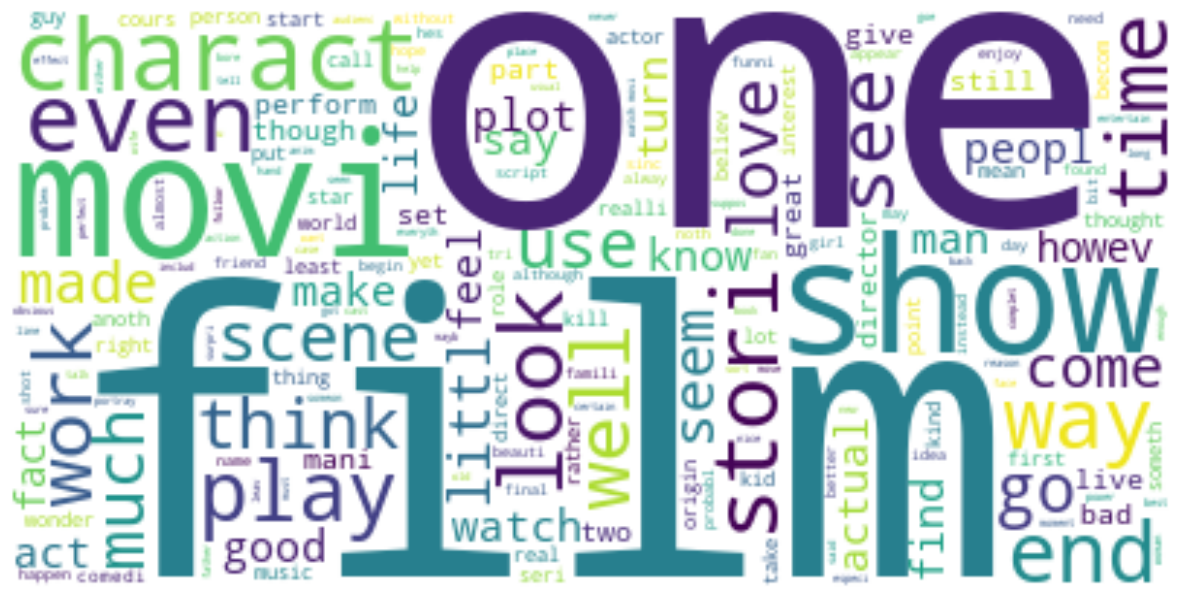

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Barplot Visualization of most occurring words

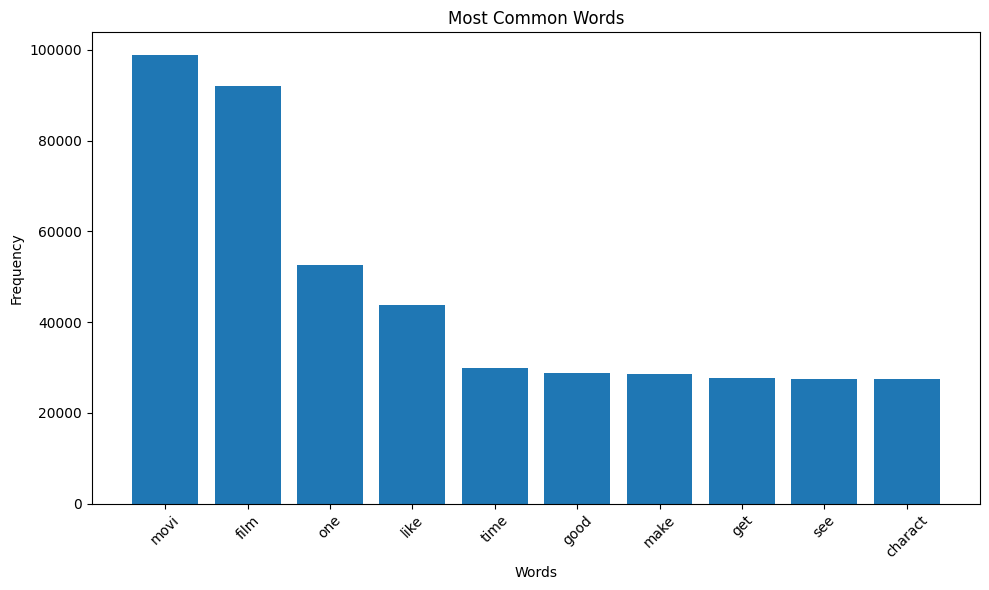

In [16]:
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from collections import Counter
import re

# Assuming 'data.review' contains a list of reviews or text data
text = " ".join(i for i in data.review)

# Preprocessing the text: Convert to lowercase and remove non-alphanumeric characters
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

# Splitting the cleaned text into words
words = cleaned_text.split()

# Creating a Counter to count word occurrences
word_counts = Counter(words)

# Getting the most common words and their counts
most_common_words = word_counts.most_common(10)  # Change '10' to the desired number of words

# Extracting words and their counts for plotting
words, counts = zip(*most_common_words)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()


## Text Vectorization

In [17]:
x = np.array(data["review"])
y = np.array(data["sentiment"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Text Classification

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [20]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

['positive']
